## 단층 퍼셉트론 기반 선형 회귀 모델


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("./data/fetch_california_housing.csv")
df =data

- MedInc (Median Income): 중간 소득을 나타내며, 단위는 10,000달러입니다.
- HouseAge (House Age): 주택의 나이를 나타내며, 단위는 연도입니다.
- AveRooms (Average Rooms): 평균 방 개수를 나타냅니다.
- AveBedrms (Average Bedrooms): 평균 침실 개수를 나타냅니다.
- Population: 각 구역의 인구 수를 나타냅니다.
- AveOccup (Average Occupancy): 가구당 평균 거주자 수를 나타냅니다.
- Latitude: 각 구역의 위도를 나타냅니다.
- Longitude: 각 구역의 경도를 나타냅니다.
- MedHouseVal (Median House Value): 중간 주택 가치를 나타내며, 단위는 10,000달러입니다.<=  타겟

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


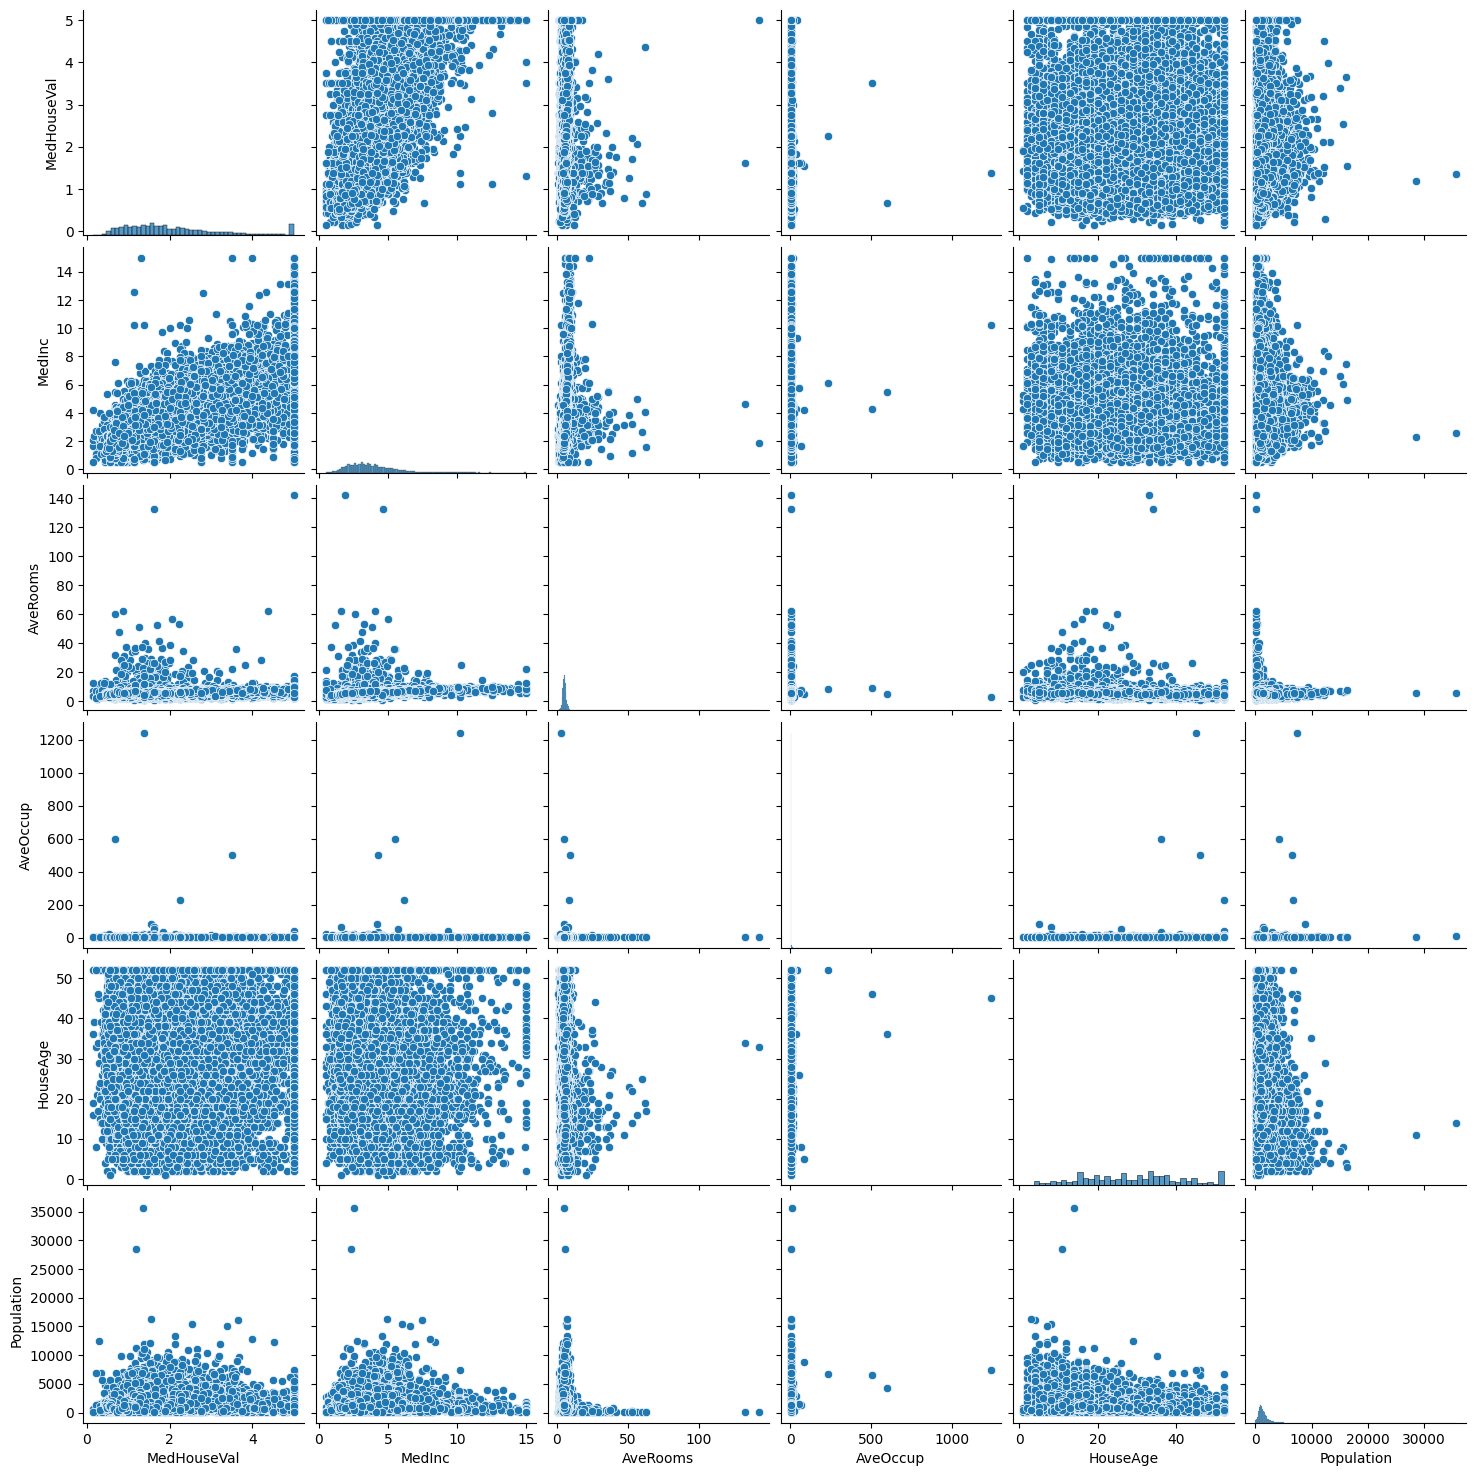

In [9]:
cols = ['MedHouseVal','MedInc','AveRooms','AveOccup','HouseAge','Population']

sns.pairplot(df[cols])
plt.show()

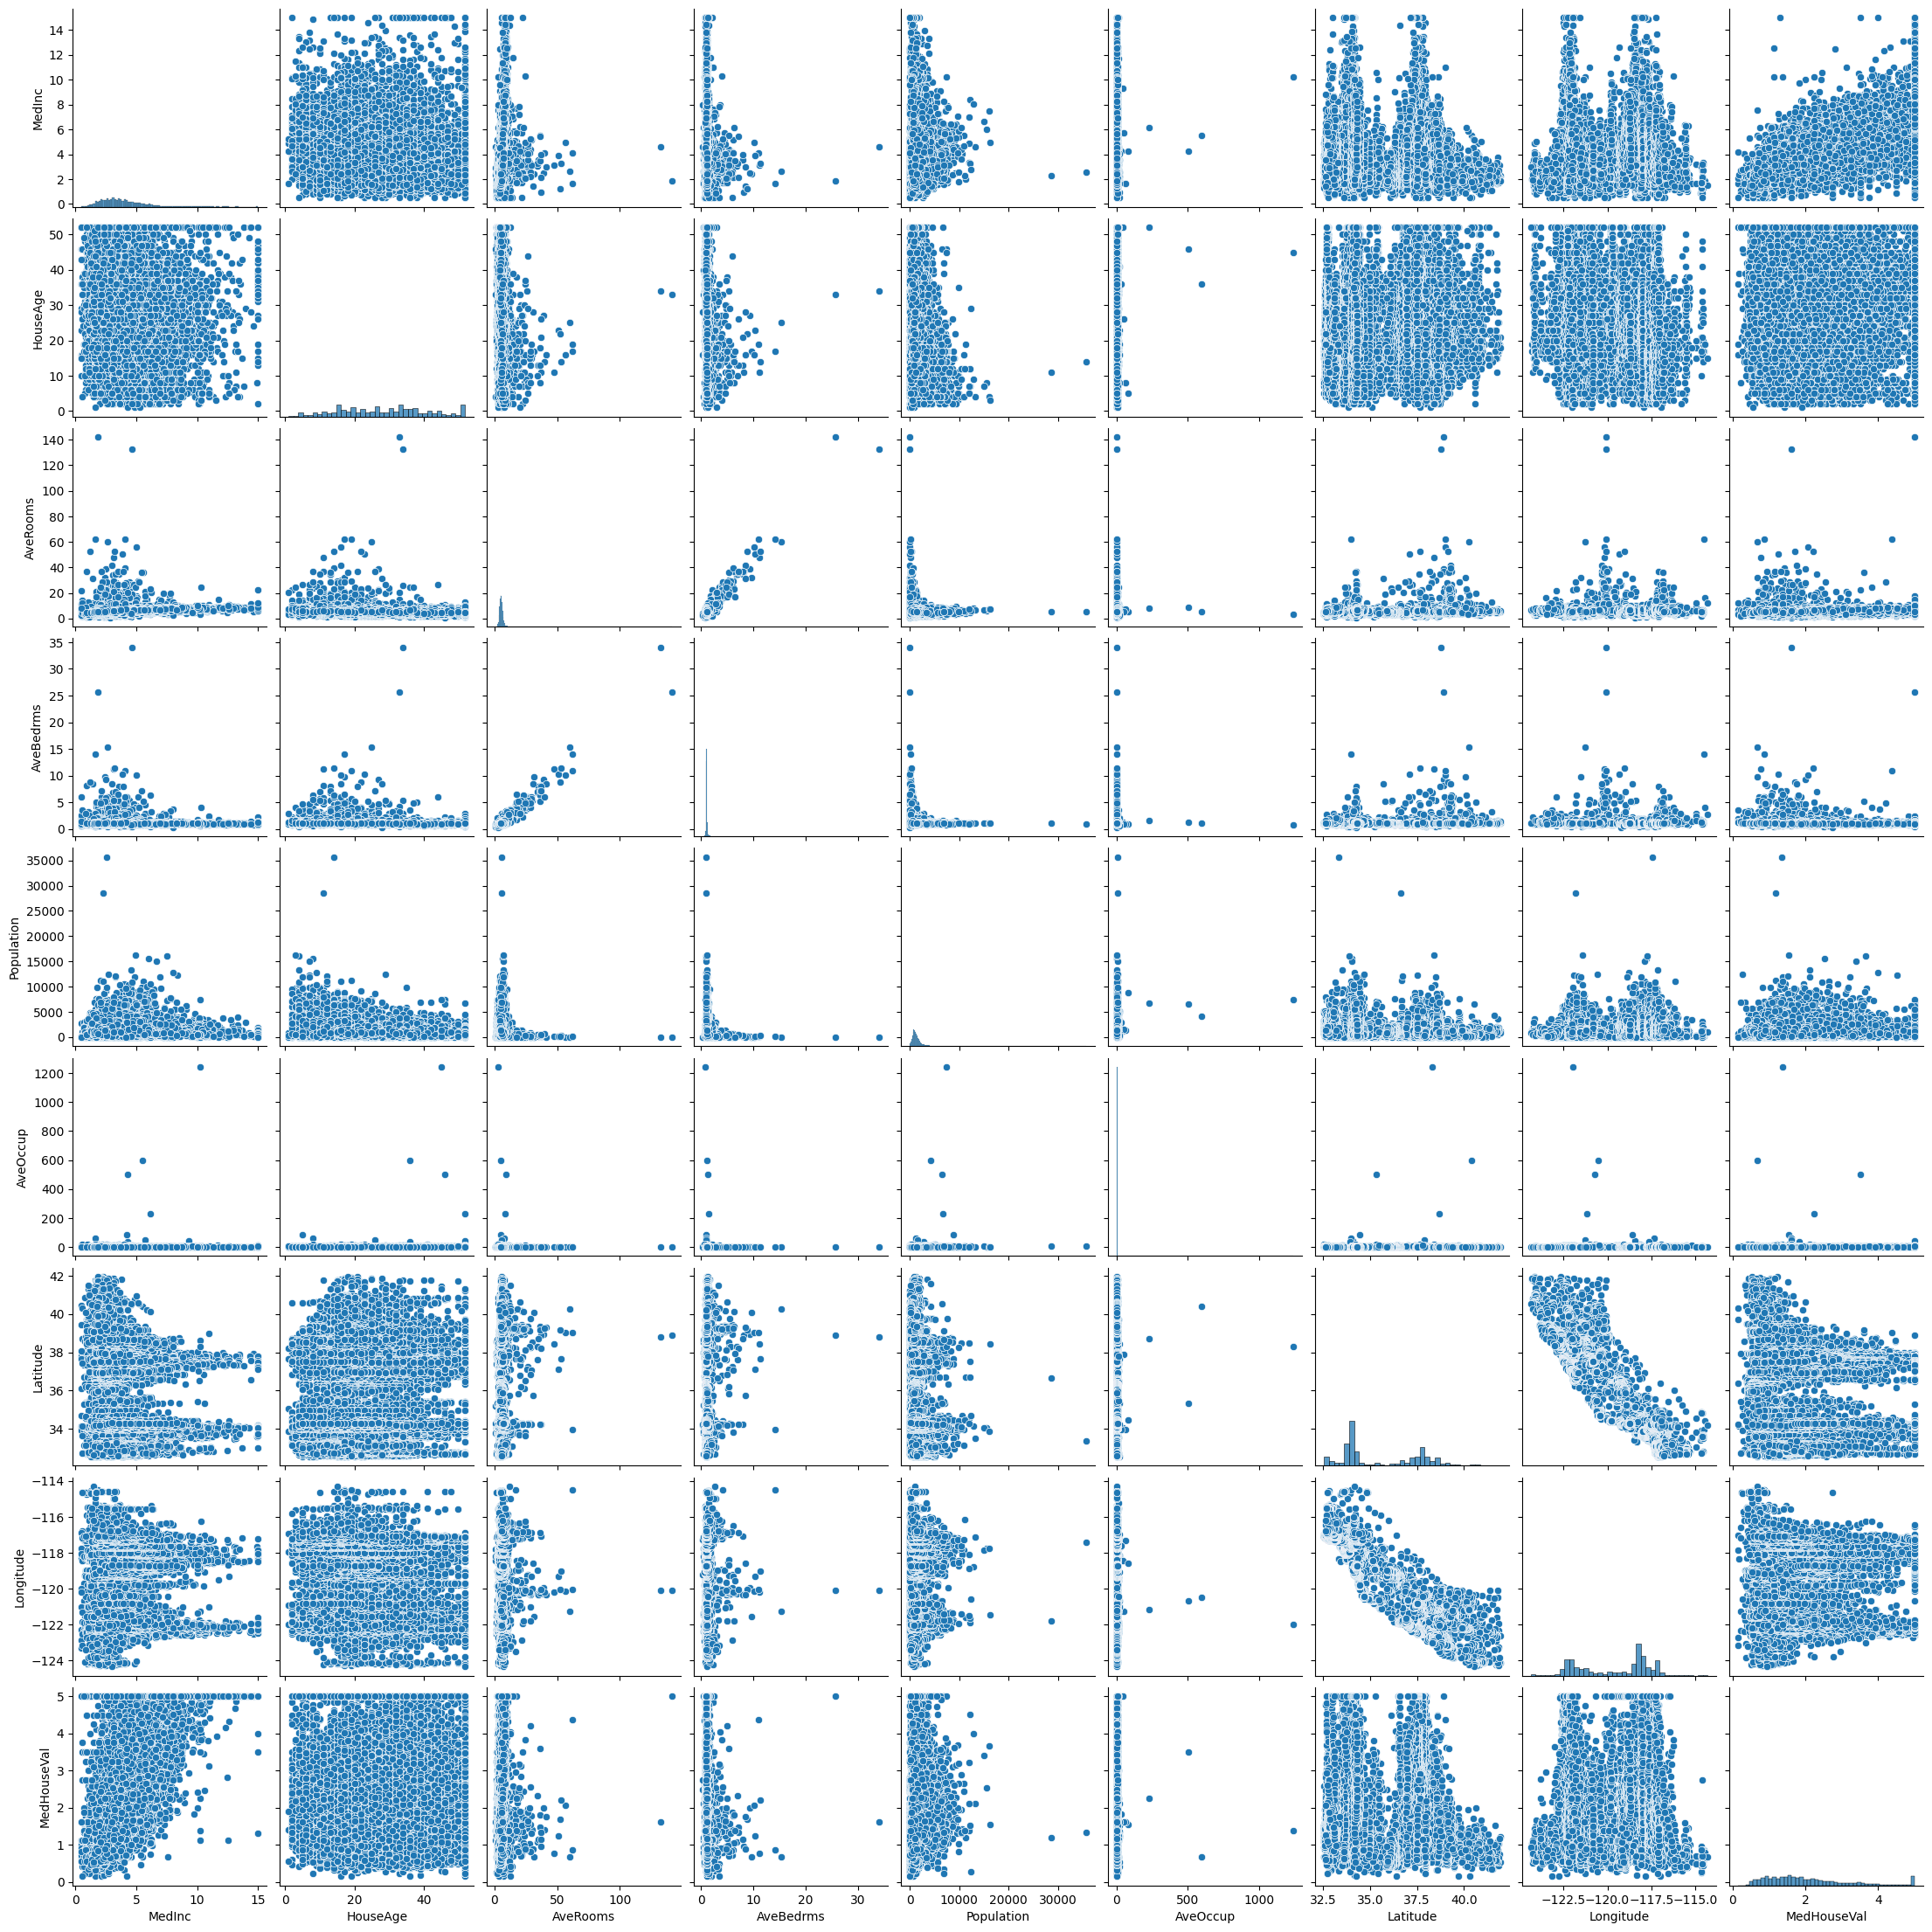

In [10]:
sns.pairplot(df)
plt.show()

pytorch로 선형 모델 학습

In [11]:
import torch                        # 텐서 및 기본 연산 지원
import torch.nn as nn               # 신경망 모델 구성 도(nn.Linear, nn.Sequential 등)
import torch.nn.functional as F     # 다양한 함수형 연산 지원 (F.relu, F.mse_loss 등)
import torch.optim as optim         # 최적화 알고리즘 (SGD, Adam 등)

In [16]:
 # df[cols]의 numpy 배열로 변환 후에 이를 FloatTensor()형태로 변환했다.
data = torch.from_numpy(df[cols].values).float() 
 
print(data.shape)
print(data.size())

torch.Size([20640, 6])
torch.Size([20640, 6])


In [19]:
# 입력변수 x와 타겟값y를 분리 (범위형 분리로 차원 shape 유지)
x = data[:, 1:] # 입력 변수
y = data[:, :1] # 타겟값

x_min = x.min(dim=0, keepdim=True).values # 열별 최소값
x_max = x.max(dim=0, keepdim=True).values # 열별 최대값
x = (x- x_min) / (x_max - x_min) # x값을 0 ~ 1 사이로 만들어주는 minmax Scaler와 동일한 효과

print(x.shape,y.shape)

torch.Size([20640, 5]) torch.Size([20640, 1])


In [18]:
x.min(dim=0, keepdim=True).values

tensor([[0.4999, 0.8462, 0.6923, 1.0000, 3.0000]])

## 모델 학습을 위한 하이퍼 파라미터 설정

In [22]:
n_epochs = 2000         # 전체 학습 반복 횟수
learning_rate = 1e-3    # 학습률 : 파라미터를 얼마나 빠르게 업데이트할지 결정한다.
print_interval = 100    # 학습 중 손실(loss)을 출력할 간격 (몇 epoch마다 출력할지)

In [21]:
# 모델 정의
model = nn.Linear(x.size(-1),y.size(-1)) # 입력은 5개 컬림,출력은 1 (주택 가격 예측)

In [ ]:
# optimizer (최적화 함수): 모델의 파라미터를 자동으로 업데이트 해준다.
# .backward()와 optimizer.step()을 통해 자동으로 파라미터 업데이트
optimizer = optim.SGD(  # 확률적 경사 하강법 SGD
    model.parameters(), # 학습 대상이 되는 모델의 가중치와 편향
    lr = learning_rate  # 학습률
)

In [ ]:
for i in range(1000):
    y_hat = model(x)    # 순전파
    loss = F.mse_loss(y_hat,y)

    optimizer.zero_grad()   # 기울기 초기화
    loss.backward()         # 역전파

    optimizer.step()        # 파라미터 업데이트

    if(i+1) % print_interval == 0: # 100번 돌때마다
            print(f"Epoch{i+1}: loss={loss:.4e}") # 소수점 4자리의 지수표현식으로 표현


Epoch100: loss=6.5411e-01
Epoch200: loss=6.5410e-01
Epoch300: loss=6.5410e-01
Epoch400: loss=6.5409e-01
Epoch500: loss=6.5408e-01
Epoch600: loss=6.5408e-01
Epoch700: loss=6.5407e-01
Epoch800: loss=6.5407e-01
Epoch900: loss=6.5406e-01
Epoch1000: loss=6.5405e-01
Epoch1100: loss=6.5405e-01
Epoch1200: loss=6.5404e-01
Epoch1300: loss=6.5403e-01
Epoch1400: loss=6.5403e-01
Epoch1500: loss=6.5402e-01
Epoch1600: loss=6.5402e-01
Epoch1700: loss=6.5401e-01
Epoch1800: loss=6.5400e-01
Epoch1900: loss=6.5400e-01
Epoch2000: loss=6.5399e-01
Epoch2100: loss=6.5399e-01
Epoch2200: loss=6.5398e-01
Epoch2300: loss=6.5398e-01
Epoch2400: loss=6.5397e-01
Epoch2500: loss=6.5396e-01
Epoch2600: loss=6.5396e-01
Epoch2700: loss=6.5395e-01
Epoch2800: loss=6.5395e-01
Epoch2900: loss=6.5394e-01
Epoch3000: loss=6.5394e-01
Epoch3100: loss=6.5393e-01
Epoch3200: loss=6.5393e-01
Epoch3300: loss=6.5392e-01
Epoch3400: loss=6.5391e-01
Epoch3500: loss=6.5391e-01
Epoch3600: loss=6.5390e-01
Epoch3700: loss=6.5390e-01
Epoch3800:

torch.cat([y, y_hat], dim = 1) : 예측값과 실제값을 열방향으로 이어붙임
.detach().numpy() : 텐서는 기본적으로 계산 그래프가 같이 나오는데 이를 detach()로 분리하고, 넘파이 배열로 값만 변환

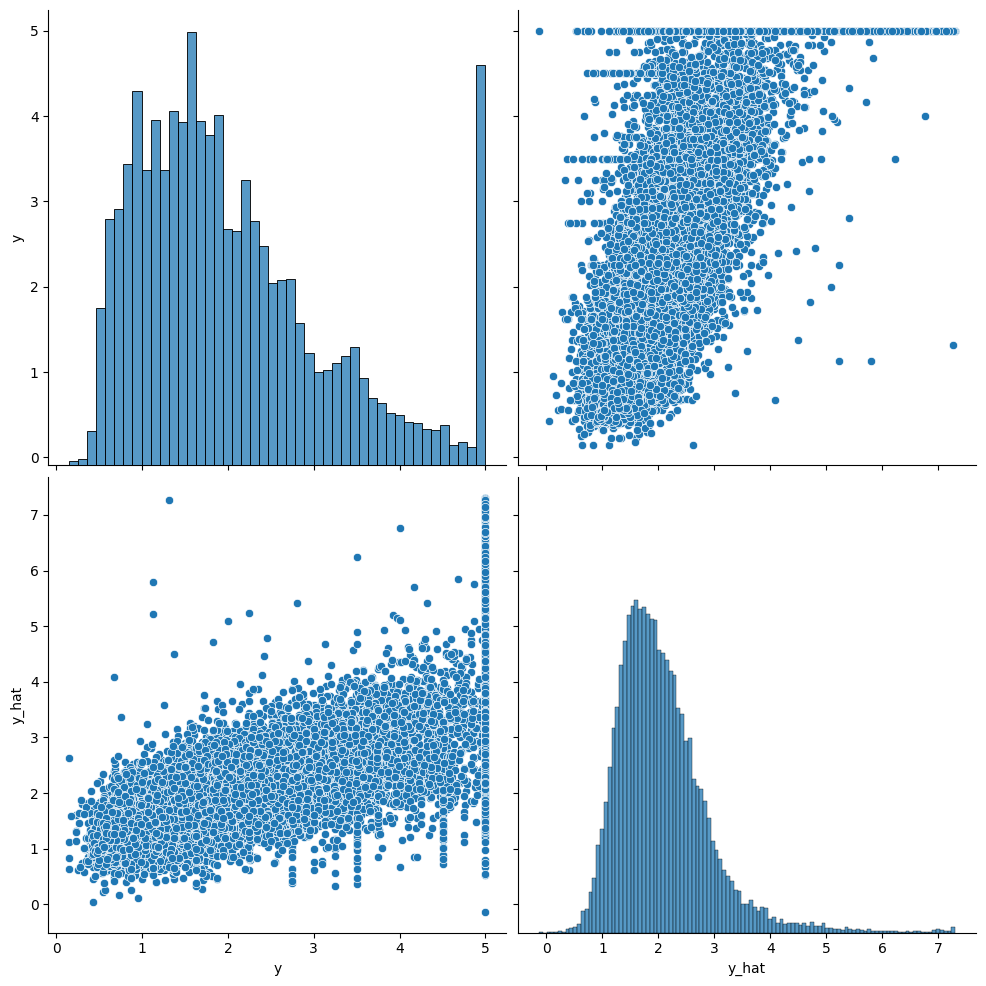

In [28]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach().numpy(),columns = ["y","y_hat"])


sns.pairplot(df, height= 5)
plt.show()

선형 모델로 어느정도는 예측 가능했으나, 역시나 가격이 높은 줕캑에 대해서는 과소평가 하고 있다.